In [23]:
import os
import cv2
import torch
from torchvision import transforms
from PIL import Image  # Import PIL for image conversion

# Define your images and masks directories
images_dir = "/Users/maryamrehmatulla/Desktop/images"
masks_dir = "/Users/maryamrehmatulla/Desktop/masks"  # Assuming masks are in the same directory

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to Tensor
    transforms.Resize((256, 256)),  # Resize images and masks to (256, 256)
])

def preprocess_data(images_dir, masks_dir, transform):
    images = []
    masks = []
    
    # Iterate through images in the directory
    for img_name in os.listdir(images_dir):
        if not img_name.endswith('.png'):  # Ensure only PNG files are processed
            continue
        
        img_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, img_name)  # Assuming mask names are the same as image names
        
        # Read images and masks
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read mask as grayscale
        
        # Check if images are loaded properly
        if img is None or mask is None:
            continue
        
        # Apply transformations
        img = transform(img)
        mask = transform(mask)
        
        # Append to lists
        images.append(img)
        masks.append(mask)
    
    return images, masks

# Preprocess data
images, masks = preprocess_data(images_dir, masks_dir, transform)

# Convert lists to PyTorch tensors
images_tensor = torch.stack(images)
masks_tensor = torch.stack(masks)

# Print shapes for verification
print(f"Images tensor shape: {images_tensor.shape}")
print(f"Masks tensor shape: {masks_tensor.shape}")


libpng error: Read Error
[ WARN:0@23.635] global loadsave.cpp:241 findDecoder imread_('/Users/maryamrehmatulla/Desktop/masks/clx3pk7il193907277eut0ch3.png'): can't open/read file: check file path/integrity
[ WARN:0@43.094] global loadsave.cpp:241 findDecoder imread_('/Users/maryamrehmatulla/Desktop/masks/clx3oto5m0yc80786qsy7y91p.png'): can't open/read file: check file path/integrity
[ WARN:0@95.315] global loadsave.cpp:241 findDecoder imread_('/Users/maryamrehmatulla/Desktop/masks/clx3oto5m0yce0786fj6ycmv0.png'): can't open/read file: check file path/integrity
[ WARN:0@110.723] global loadsave.cpp:241 findDecoder imread_('/Users/maryamrehmatulla/Desktop/masks/clx3oto5m0ybh0786y4w83yxp.png'): can't open/read file: check file path/integrity
[ WARN:0@122.998] global loadsave.cpp:241 findDecoder imread_('/Users/maryamrehmatulla/Desktop/masks/clx3nafw517kz0727kn6krqzc.png'): can't open/read file: check file path/integrity
libpng error: IDAT: CRC error
[ WARN:0@148.761] global loadsave.cpp:

Images tensor shape: torch.Size([84, 3, 256, 256])
Masks tensor shape: torch.Size([84, 1, 256, 256])


Epoch 0/59
----------
LR 0.0001


/Users/maryamrehmatulla/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train: bce: 0.680213, dice: 0.990544, loss: 0.835379
val: bce: 0.671923, dice: 0.991026, loss: 0.831475
saving best model
2m 15s
Epoch 1/59
----------
LR 0.0001
train: bce: 0.667135, dice: 0.990523, loss: 0.828829
val: bce: 0.659203, dice: 0.991010, loss: 0.825106
saving best model
2m 18s
Epoch 2/59
----------
LR 0.0001
train: bce: 0.653244, dice: 0.990508, loss: 0.821876
val: bce: 0.641278, dice: 0.990999, loss: 0.816138
saving best model
2m 21s
Epoch 3/59
----------
LR 0.0001
train: bce: 0.631204, dice: 0.990498, loss: 0.810851
val: bce: 0.610825, dice: 0.990996, loss: 0.800910
saving best model
2m 14s
Epoch 4/59
----------
LR 0.0001
train: bce: 0.592779, dice: 0.990510, loss: 0.791644
val: bce: 0.554664, dice: 0.991039, loss: 0.772852
saving best model
2m 6s
Epoch 5/59
----------
LR 0.0001
train: bce: 0.515310, dice: 0.990636, loss: 0.752973
val: bce: 0.420575, dice: 0.991398, loss: 0.705986
saving best model
2m 10s
Epoch 6/59
----------
LR 0.0001
train: bce: 0.298174, dice: 0.99211

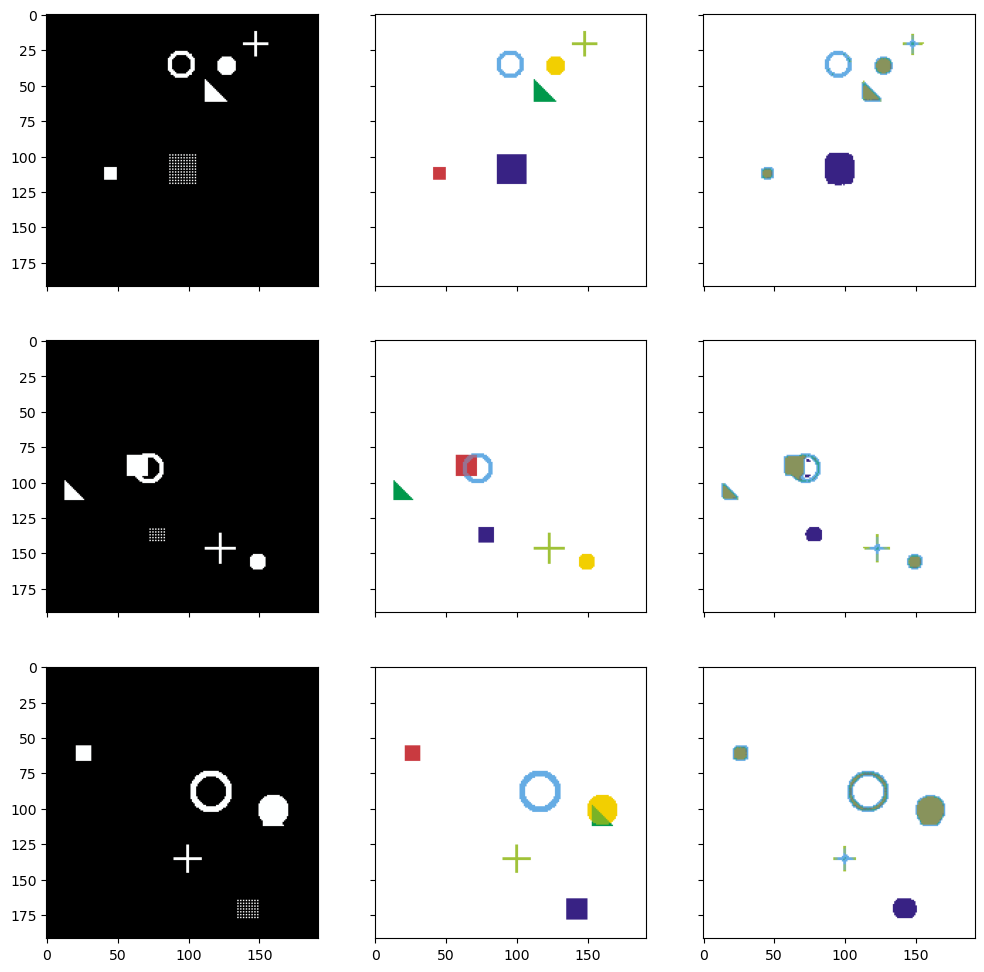

In [24]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assuming you have images_tensor and masks_tensor from your preprocessing step
dataset = TensorDataset(images_tensor, masks_tensor)
batch_size = 2  # Adjust batch size as needed
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

from Model import UNet  # Import your U-Net model

# Instantiate your U-Net model
model = UNet(n_class=1)  # Adjust n_class according to your task (e.g., number of classes for segmentation)

# Load model weights if needed
# model.load_state_dict(torch.load('path_to_your_model_weights.pth'))

model.eval()  # Set model to evaluation mode
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Choose device

predictions = []

# Iterate through the DataLoader for inference
with torch.no_grad():
    for images, masks in dataloader:
        images = images.to(device)
        
        # Perform inference
        outputs = model(images)
        
        # Assuming your model outputs logits, you might want to apply a sigmoid activation for probabilities
        # For example:
        # outputs = torch.sigmoid(outputs)
        
        # Append predictions (outputs) to the list
        predictions.append(outputs.cpu().detach())  # Detach and move to CPU if necessary

# Convert predictions list to a single tensor
predictions_tensor = torch.cat(predictions, dim=0)

# Print or process predictions as needed
print(f"Predictions tensor shape: {predictions_tensor.shape}")



In [30]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Example predictions and masks (replace with your actual data)
predictions = np.array([0, 1, 1, 0])  # Replace with your predictions
masks = np.array([0, 1, 0, 1])  # Replace with your ground truth masks

# Calculate precision, recall, and F1 score for binary classification
precision, recall, f1, _ = precision_recall_fscore_support(masks, predictions, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.5000
Recall: 0.5000
F1 Score: 0.5000
